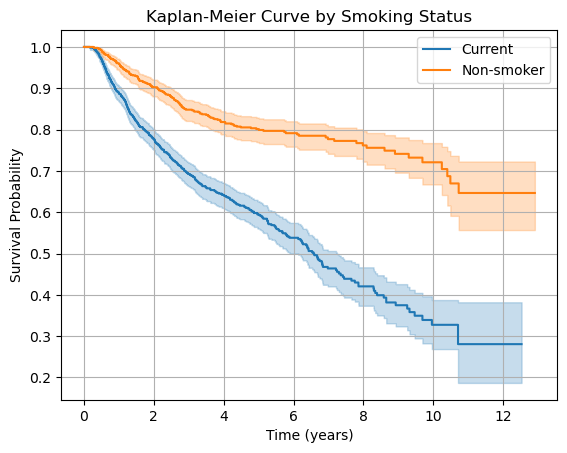

Log-rank test between Current and Non-smoker: p-value = 3.8797010741215883e-29


In [41]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# Read in data
clinical = pd.read_excel('../Data/RADCURE_Clinical_v04_20241219.xlsx')

# Convert status to binary
clinical['Event'] = clinical['Status'].map({'Dead': 1, 'Alive': 0})

# Fit Kaplan-Meier Estimator 
def plot_km(clinical, group_col, group1, group2):
    kmf = KaplanMeierFitter()
   
    # Subset groups
    group1_data = clinical[clinical[group_col] == group1]
    group2_data = clinical[clinical[group_col] == group2]
        
    # Fit curves
    kmf.fit(group1_data['Length FU'], event_observed=group1_data['Event'], label = group1)
    kmf.plot_survival_function()
    
    kmf.fit(group2_data['Length FU'], event_observed=group2_data['Event'], label = group2)
    kmf.plot_survival_function()
    
    # Plot config
    plt.style.use('default')
    plt.title(f'Kaplan-Meier Curve by {group_col}')
    plt.xlabel('Time (years)')
    plt.ylabel('Survival Probability')
    plt.grid(True)
    plt.show()
    
    # Perform Log-Rank test
    lrt = logrank_test(group1_data['Length FU'], group2_data['Length FU'], 
                       event_observed_A=group1_data['Event'], event_observed_B=group2_data['Event'])
    print(f'Log-rank test between {group1} and {group2}: p-value = {lrt.p_value}')

plot_km(clinical, 'Smoking Status', 'Current', 'Non-smoker')

